In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LaTeX style plots
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
    }
plt.rcParams.update(tex_fonts)

In [2]:
# read in dataset and make datetime format on index column
df = pd.read_csv('../air_weather_data/pollution_and_weather.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M')
df = df.set_index('Date')

In [3]:
np.sum(df.iloc[:,:] <0) # values below zero
df.isna().sum()
df;

# Define a plot function

In [4]:
# plot function for time series
def plot_time_series(df, row, cols, figsize, savefig=False, fig_path=None):

    fig, axes = plt.subplots(row, cols, constrained_layout = True, figsize = figsize)
    # now 12 possible labels
    annot = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)'] 
    j = 0
    for i, ax in enumerate(fig.axes):
        df.iloc[:, j].plot(ax = ax, linewidth = 1.0) # linewidth default = 1.5
        ax.set_xlabel('')
        # set y label on plots with even index 
        if j%2 == 0:
            ax.set_ylabel('$\mu$g/m$^3$')
            
        ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
        ax.annotate(annot[i], xy=(0.0, 1.09), xycoords="axes fraction")
        j += 1
    if savefig:
        plt.savefig(fig_path)

# Make time series plots of PM2.5 and PM10

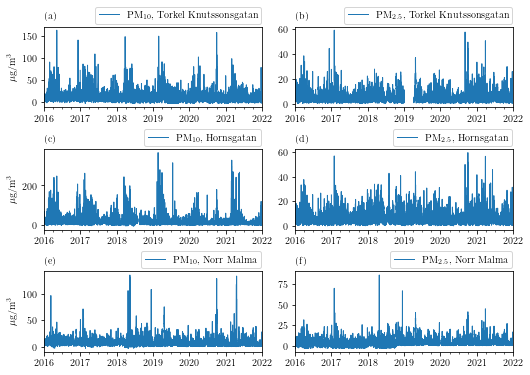

In [5]:
df_temp = df[['PM$_{10}$, Torkel Knutssonsgatan', 
              'PM$_{2.5}$, Torkel Knutssonsgatan',
            #   'Torkel Knutssonsgatan, NO$_2$',
              'PM$_{10}$, Hornsgatan', 
              'PM$_{2.5}$, Hornsgatan',
              'PM$_{10}$, Norr Malma', 
              'PM$_{2.5}$, Norr Malma'
              ]]

df_temp = df_temp['2016-01-01 00:00:00':]

plot_time_series(df_temp, row=3, cols=2, figsize=(7.25, 5.1), savefig=True, fig_path='../plots/time_series_plots.pdf')
# plot_time_series(df_temp, row=6, cols=1, figsize=(5, 8.5), savefig=False, fig_path='../plots/time_series_plots_7.pdf')

# Make correlation matrix 

In [6]:
df_corr = df[['PM$_{10}$, Torkel Knutssonsgatan', 
              'PM$_{2.5}$, Torkel Knutssonsgatan',
              'PM$_{10}$, Hornsgatan', 
              'PM$_{2.5}$, Hornsgatan',
              'PM$_{10}$, Norr Malma', 
              'PM$_{2.5}$, Norr Malma',
              'Temperature',
              'Atmospheric pressure',
              'Relative humidity',
              'Precipitation',
              'Solar radiation',
              'Wind speed']]

mat = df_corr.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (8,7), constrained_layout = True)
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=True, cmap='coolwarm')

plt.savefig('../plots/correlation_matrix.pdf')

# Make plots of sine day and cosine day signals

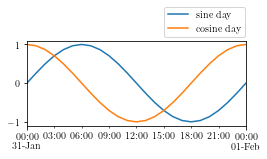

In [ ]:
fig, ax1 = plt.subplots(constrained_layout = True, figsize = (3.6, 2.1))
df['2016-01-31 00:00:00':'2016-02-01 00:00:00'][['sine day', 'cosine day']].plot(ax=ax1)
plt.xlabel('')
plt.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
# plt.savefig('../plots/time_signals.pdf')

# Interpolate missing data points, remover negative values, and scale to standard units